# Shape

Geometry library used in [PackingSolver](https://github.com/fontanf/packingsolver)

The main particularity of this library is that shapes primitives might be line segments and/or circular arcs. The library is also designed to be robust and return 'expected outputs' over being fast.

In [1]:
#pragma cling add_include_path("/home/florian/Dev/shape/include")
#pragma cling add_library_path("/home/florian/Dev/shape/build/src")
#pragma cling load("libShape_shape_shared.so")

In [2]:
#include <string>
#include <fstream>

#include "xtl/xbase64.hpp"
#include "nlohmann/json.hpp"

namespace nl = nlohmann;

namespace im
{
    struct image
    {
        inline image(const std::string& filename)
        {
            std::ifstream fin(filename, std::ios::binary);
            m_buffer << fin.rdbuf();
        }

        std::stringstream m_buffer;
    };

    nl::json mime_bundle_repr(const image& i)
    {
        auto bundle = nl::json::object();
        bundle["image/png"] = xtl::base64encode(i.m_buffer.str());
        return bundle;
    }
}

In [3]:
#include <iostream>
#include "shape/shape.hpp"
#include "shape/writer.hpp"

## Examples

### Inflate generating circular arcs on vertices

shape shape (# elements 8)
  CircularArc start (-25, 0) end (0, -25) center (0, 0) orientation Anticlockwise
  LineSegment start (0, -25) end (100, -25)
  CircularArc start (100, -25) end (125, 0) center (100, 0) orientation Anticlockwise
  LineSegment start (125, 0) end (125, 100)
  CircularArc start (125, 100) end (100, 125) center (100, 100) orientation Anticlockwise
  LineSegment start (100, 125) end (0, 125)
  CircularArc start (0, 125) end (-25, 100) center (0, 100) orientation Anticlockwise
  LineSegment start (-25, 100) end (-25, 0)



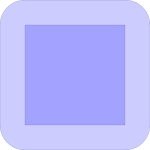

In [4]:
#include "shape/offset.hpp"

shape::Shape square = shape::build_square(100);
shape::ShapeWithHoles inflated_square = shape::inflate(square, 25);
std::cout << inflated_square.to_string(2) << std::endl;
shape::Writer().add_shape(square).add_shape_with_holes(inflated_square).write_svg("tmp.svg");
std::system(std::string("convert \"tmp.svg\" \"tmp.png\"").c_str()); im::image image("tmp.png"); image

### Intersection between two overlapping line segments

overlapping parts:
- LineSegment start (50, 75) end (33.33333333333334, 50)
impropoer intersections:
propoer intersections:


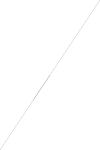

In [5]:
#include "shape/elements_intersections.hpp"

shape::ShapeElement line_segment_1 = shape::build_line_segment({100, 150}, {0, 0});
shape::ShapeElement line_segment_2 = shape::build_line_segment({33.33333333333334, 50}, {50, 75});
shape::ShapeElementIntersectionsOutput intersections = compute_intersections(line_segment_1, line_segment_2);
std::cout << intersections.to_string(0) << std::endl;
shape::Writer().add_element(line_segment_1).add_element(line_segment_2).write_svg("tmp.svg");
std::system(std::string("convert \"tmp.svg\" \"tmp.png\"").c_str()); im::image image("tmp.png"); image

### Intersection between two circular arcs overlapping twice

overlapping parts:
- CircularArc start (-100, 0) end (0, -100) center (0, 0) orientation Anticlockwise
- CircularArc start (100, 0) end (0, 100) center (0, 0) orientation Anticlockwise
impropoer intersections:
propoer intersections:


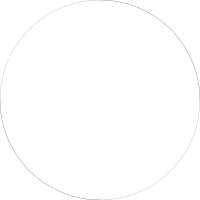

In [6]:
#include "shape/elements_intersections.hpp"

shape::ShapeElement circular_arc_1 = shape::build_circular_arc({100, 0}, {0, -100}, {0, 0}, shape::ShapeElementOrientation::Anticlockwise);
shape::ShapeElement circular_arc_2 = shape::build_circular_arc({-100, 0}, {0, 100}, {0, 0}, shape::ShapeElementOrientation::Anticlockwise);
shape::ShapeElementIntersectionsOutput intersections = compute_intersections(circular_arc_1, circular_arc_2);
std::cout << intersections.to_string(0) << std::endl;
shape::Writer().add_element(circular_arc_1).add_element(circular_arc_2).write_svg("tmp.svg");
std::system(std::string("convert \"tmp.svg\" \"tmp.png\"").c_str()); im::image image("tmp.png"); image

### Intersection between a line segment and a circular arc

overlapping parts:
impropoer intersections:
- (-100, 0)
propoer intersections:
- (60, 80)


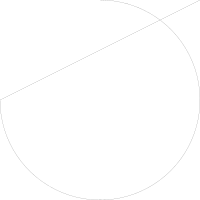

In [7]:
#include "shape/elements_intersections.hpp"

shape::ShapeElement line_segment = shape::build_line_segment({-100, 0}, {100, 100});
shape::ShapeElement circular_arc = shape::build_circular_arc({-100, 0}, {0, 100}, {0, 0}, shape::ShapeElementOrientation::Anticlockwise);
shape::ShapeElementIntersectionsOutput intersections = compute_intersections(line_segment, circular_arc);
std::cout << intersections.to_string(0) << std::endl;
shape::Writer().add_element(line_segment).add_element(circular_arc).write_svg("tmp.svg");
std::system(std::string("convert \"tmp.svg\" \"tmp.png\"").c_str()); im::image image("tmp.png"); image

### Union between a rectangle and a circle

shape shape (# elements 6)
LineSegment start (0, 0) end (100, 0)
LineSegment start (100, 0) end (100, 50)
LineSegment start (100, 50) end (70, 50)
CircularArc start (70, 50) end (30, 50) center (50, 50) orientation Anticlockwise
LineSegment start (30, 50) end (0, 50)
LineSegment start (0, 50) end (0, 0)



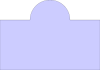

In [8]:
#include "shape/boolean_operations.hpp"

shape::Shape rectangle = shape::build_rectangle(100, 50);
shape::Shape circle = shape::build_circle(20).shift(50, 50);
std::vector<shape::ShapeWithHoles> result = shape::compute_union({{rectangle}, {circle}});
for (const shape::ShapeWithHoles& shape: result)
    std::cout << shape.to_string(0) << std::endl;
shape::Writer().add_shapes_with_holes(result).write_svg("tmp.svg");
std::system(std::string("convert \"tmp.svg\" \"tmp.png\"").c_str()); im::image image("tmp.png"); image

### Intersection between a rectangle and a circle

In [9]:
#include "shape/boolean_operations.hpp"

shape::Shape rectangle = shape::build_rectangle(100, 50);
shape::Shape circle = shape::build_circle(20).shift(50, 50);
std::vector<shape::ShapeWithHoles> result = shape::compute_intersection({{rectangle}, {circle}});
for (const shape::ShapeWithHoles& shape: result)
    std::cout << shape.to_string(0) << std::endl;
shape::Writer().add_shapes_with_holes(result).write_svg("tmp.svg");
std::system(std::string("convert \"tmp.svg\" \"tmp.png\"").c_str()); im::image image("tmp.png"); image

shape shape (# elements 2)
CircularArc start (30, 50) end (70, 50) center (50, 50) orientation Anticlockwise
LineSegment start (70, 50) end (30, 50)



### Difference between a rectangle and a circle

shape shape (# elements 6)
LineSegment start (0, 0) end (100, 0)
LineSegment start (100, 0) end (100, 50)
LineSegment start (100, 50) end (70, 50)
CircularArc start (70, 50) end (30, 50) center (50, 50) orientation Clockwise
LineSegment start (30, 50) end (0, 50)
LineSegment start (0, 50) end (0, 0)



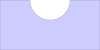

In [10]:
#include "shape/boolean_operations.hpp"

shape::Shape rectangle = shape::build_rectangle(100, 50);
shape::Shape circle = shape::build_circle(20).shift(50, 50);
std::vector<shape::ShapeWithHoles> result = shape::compute_difference({rectangle}, {{circle}});
for (const shape::ShapeWithHoles& shape: result)
    std::cout << shape.to_string(0) << std::endl;
shape::Writer().add_shapes_with_holes(result).write_svg("tmp.svg");
std::system(std::string("convert \"tmp.svg\" \"tmp.png\"").c_str()); im::image image("tmp.png"); image

### Symmetric difference between a rectangle and a circle

shape shape (# elements 6)
LineSegment start (0, 0) end (100, 0)
LineSegment start (100, 0) end (100, 50)
LineSegment start (100, 50) end (70, 50)
CircularArc start (70, 50) end (30, 50) center (50, 50) orientation Clockwise
LineSegment start (30, 50) end (0, 50)
LineSegment start (0, 50) end (0, 0)

shape shape (# elements 2)
LineSegment start (30, 50) end (70, 50)
CircularArc start (70, 50) end (30, 50) center (50, 50) orientation Anticlockwise



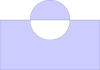

In [11]:
#include "shape/boolean_operations.hpp"

shape::Shape rectangle = shape::build_rectangle(100, 50);
shape::Shape circle = shape::build_circle(20).shift(50, 50);
std::vector<shape::ShapeWithHoles> result = shape::compute_symmetric_difference({rectangle}, {circle});
for (const shape::ShapeWithHoles& shape: result)
    std::cout << shape.to_string(0) << std::endl;
shape::Writer().add_shapes_with_holes(result).write_svg("tmp.svg");
std::system(std::string("convert \"tmp.svg\" \"tmp.png\"").c_str()); im::image image("tmp.png"); image